# Naive Bayes classification with Python

We'll try to use Naive Bayes to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

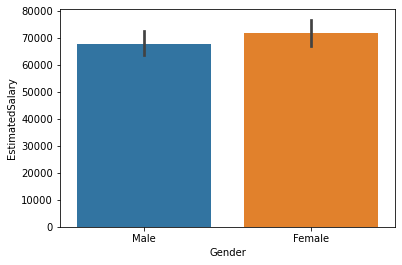

In [9]:
sns.barplot(data = dataset, y = dataset.EstimatedSalary,x=dataset.Gender)

## Check for null values

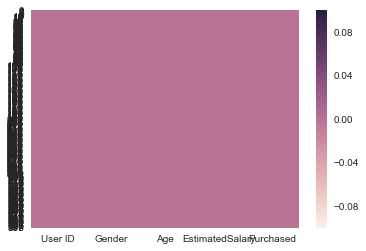

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

## Check correlation

<AxesSubplot:>

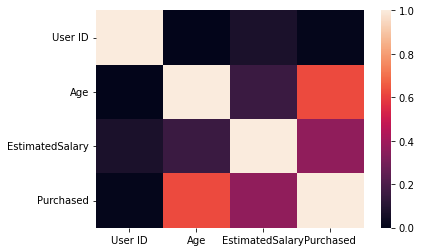

In [11]:
sns.heatmap(dataset.corr())

## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [12]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(dataset.drop('Purchased',axis=1))

ValueError: could not convert string to float: 'Male'

In [15]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary','Gender'])
df_feat.head()

NameError: name 'scaled_features' is not defined

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30)

In [ ]:
X_train['target'] = y_train

In [ ]:
X_train.to_csv('train.csv')

## Using Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [16]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations

Let's evaluate our decision tree model!

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[73,  5],
       [ 7, 35]])

# Great Job!